In [1]:
SET_A={"a", "b", "c"} # Set 1 given in question
SET_B={"d", "e", "f"}  # Set 2 given in question
# Creating a Function to check counting measure of disjoint sets
def counting_measure(input): 
     if not isinstance(input,set):
         raise TypeError("Input type is incorrect.Give Set as input type")
     return len(input) 
count_SET_A= counting_measure(SET_A)
count_SET_B= counting_measure(SET_B)
Result=count_SET_A + count_SET_B
union_AB=SET_A.union(SET_B)
count_AB=counting_measure(union_AB)
if (Result==count_AB):
    print(" Satisfies additivity on the disjoint sets ")
else:     
    print("Not Satisfies additivity on the disjoint sets")



 Satisfies additivity on the disjoint sets 


In [2]:
# Creating  a  Interval class which ensures two things.First Interval must be numeric and second start must be less than end.
class Interval:                               
    def __init__(self, startpoint, endpoint):
        if not isinstance(startpoint, (int, float)) and not isinstance(endpoint, (int, float)):
              raise ValueError(" Please give starting point and ending point a numerical value")
        if startpoint > endpoint:
               raise ValueError("Invalid interval: Starting point must be less than the ending point")
        self.startpoint = startpoint
        self.endpoint = endpoint

    def length(self):
        return self.endpoint - self.startpoint
        
# Creating  a  Interval length function which impletments the length measure on provided interval.
def interval_length(interval):
    if not isinstance(interval, Interval):
        raise ValueError("Input is not a valid Interval object")
    return interval.length()

# Testing the interval and length calculation function
try:
    interval = Interval(1,3.5)
    length = interval_length(interval)
    print(f" Result : Length of the interval  {interval.startpoint} & {interval.endpoint} = {length}")
except ValueError as e:
    print(f"Error: {e}")


 Result : Length of the interval  1 & 3.5 = 2.5


Probability measure of interval 1: 0.8647
Probability measure of interval 2: 0.0000
Probability measure of interval 3: 0.1353
Probability measure of interval 4: 1.0000


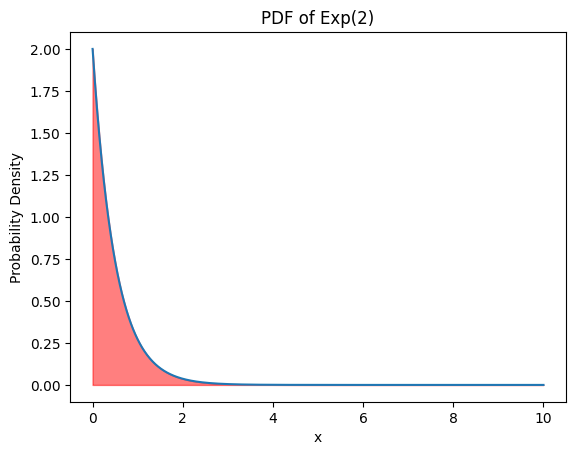

In [3]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Inheriting the Interval class from the above code
class Interval(Interval):
    def expon_measure(self):
        # As given in question we have to make  the Exponential(2) distribution
        parameter = 2
        exponential_dist = stats.expon(scale=1/parameter)

        # Calculating the cumulative distribution function (CDF) values for the interval
        cdf_start = exponential_dist.cdf(self.startpoint)
        cdf_end = exponential_dist.cdf(self.endpoint)

        # Calculate the probability mass under the Exponential(2) measure
        probability_mass = cdf_end - cdf_start

        return probability_mass

# Define the intervals
intervals = [
    Interval(0, 1),
    Interval(1, 1),
    Interval(1, 10),
    Interval(0, float("inf"))
]

# Calculate the probability measures for the intervals
for i, interval in enumerate(intervals):
    probability_mass = interval.expon_measure()
    print(f"Probability measure of interval {i + 1}: {probability_mass:.4f}")

# Plot the PDF of Exp(2)
x = np.linspace(0, 10, 1000)
pdf = stats.expon.pdf(x, scale=1/2)
plt.plot(x, pdf)
plt.title("PDF of Exp(2)")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.fill_between(x,pdf,color='red',alpha=0.5)
plt.show()


The graph which we have plotted above represents PDF of the Exponential distribution with a lambda (λ) value of 2. The probability density starts with higher values on the left side and gradually decreases as we progress along the x-axis to the right. This observation suggests that as the value of x increases, the probability density consistently declines.As we move from left of x axis to right of x axis of PDF plot CDF(Area under curve)increases.

In [4]:
from scipy.stats import expon
from scipy.integrate import quad


# Define the Exponential(2) distribution
exponential_distribution = expon(scale=1/2)

# Define the expon_pdf function
def expon_pdf(x):
    return exponential_distribution.pdf(x)

# Compute and print the integrals
integral_result1, _ = quad(expon_pdf, 0, 1)
integral_result2, _ = quad(expon_pdf, 1, 1)
integral_result3, _ = quad(expon_pdf, 1, 10)
integral_result4, _ = quad(expon_pdf, 0, float("inf"))

print(f"Integral (a): {integral_result1:}")
print(f"Integral (b): {integral_result2:}")
print(f"Integral (c): {integral_result3:}")
print(f"Integral (d): {integral_result4:}")

Integral (a): 0.8646647167633872
Integral (b): 0.0
Integral (c): 0.13533528117545912
Integral (d): 1.0


In both approaches we are calculating probablity for specific interval in exponential distribution with lamda equals to 2.

Approach 1:Current Question
           a>Using the "expon_pdf" function based on PDF.
           b>Calculating probablities via integration method on pdf function for given interval.
        
Approach 2 :Third Question
            a>Using the expon_measure function based on CDF.
            b>Measuring the cumulative probability from the start to end points of an interval.
            c>Calculating probability measures for the given intervals.
          
Result of intervals as per both approaches

(a): Probability of values between 0 and 1.
Previous Question (expon_measure): Approx  0.8647 (As Per Output)
Current Question (expon_pdf): Approx  0.8647      (As Per Output)

(b) Probability of values between 1 and 1.
Previous Question (expon_measure):Approx  0 (As Per Output)
Current Question (expon_pdf):Approx  0 (As Per Output)

(c): Probability of values between 1 and 10.
Previous Question (expon_measure):Approx  0.1353 (As Per Output)
Current Question (expon_pdf):Approx  0.1353 (As Per Output)

(d): Probability of values from 0 to infinity.
Previous Question (expon_measure): Approx 1 (As Per Output)
Current Question (expon_pdf): Approx 1 (As Per Output)

As per comparison from above pointers we can infer that both methods are mathematically equivalent .This consistency is expected because both methods are used to calculate probabilities in the context of the Exponential(2) distribution.

The answers from the current and previous questions match each other. This is because in both questions we are solving the same probability problem using two different approaches. Both routes led us to the same result.